In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import seed
import pandas as pd


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
import keras_metrics as k
from keras import optimizers

from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv("train.csv")

features = dataset.iloc[:, 5:15].values
print(features.shape)

labels = dataset.iloc[:, 15].values
print(labels.shape)
#print(labels)

print(features)

(451, 10)
(451,)
[[  8   6  12 ...  73   0   0]
 [ 14 141   8 ... 115   0   1]
 [  9   0   7 ...  26   0   0]
 ...
 [  8 149  17 ... 551   0   1]
 [ 14   0   6 ...   2   0   0]
 [ 10   0   5 ...   3   0   0]]


In [3]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state= 2255)
print(features_train.shape)

sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

print(features_train)

(405, 10)
[[ 0.1613969  -0.64267776  1.36345119 ... -0.1745739  -0.25236607
  -0.37529331]
 [-0.75494533 -0.64267776 -1.21691204 ... -0.17301408 -0.25236607
  -0.37529331]
 [ 0.1613969  -0.64267776 -1.06512597 ... -0.07474586 -0.25236607
  -0.37529331]
 ...
 [-0.14405051 -0.64267776 -1.21691204 ... -0.17145427 -0.25236607
  -0.37529331]
 [-0.14405051 -0.64267776 -0.45798168 ... -0.15741595 -0.25236607
  -0.37529331]
 [-1.36584015 -0.64267776 -1.21691204 ... -0.1745739  -0.25236607
  -0.37529331]]


In [4]:
classifier = Sequential()

classifier.add(Dense(output_dim=9, 
                     activation='relu', 
                     input_dim=10))

# classifier.add(Dense(output_dim=100, 
#                      activation='relu'))

classifier.add(Dense(output_dim=50, 
                     activation='relu'))

classifier.add(Dense(output_dim=1, 
                     activation='sigmoid'))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

classifier.compile(optimizer=adam , loss='binary_crossentropy', metrics=['accuracy'])

print(classifier.summary())
plot_model(classifier, to_file='Classifier 2 - Model Plot.png', show_shapes=True, show_layer_names=True)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 9)                 99        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 650
Trainable params: 650
Non-trainable params: 0

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=9)`
  """
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  



_________________________________________________________________
None


In [5]:
history = classifier.fit(features_train, labels_train, validation_data = [features_test,labels_test], batch_size=30, epochs=50)




Train on 405 samples, validate on 46 samples
Epoch 1/50





405/405 [==============================] - 4s 11ms/step - loss: 0.6679 - acc: 0.6173 - val_loss: 0.6339 - val_acc: 0.6957
Epoch 2/50
405/405 [==============================] - 0s 255us/step - loss: 0.6099 - acc: 0.7062 - val_loss: 0.5889 - val_acc: 0.7174
Epoch 3/50
405/405 [==============================] - 0s 245us/step - loss: 0.5740 - acc: 0.7062 - val_loss: 0.5522 - val_acc: 0.7174
Epoch 4/50
405/405 [==============================] - 0s 251us/step - loss: 0.5480 - acc: 0.7062 - val_loss: 0.5193 - val_acc: 0.7174
Epoch 5/50
405/405 [==============================] - 0s 250us/step - loss: 0.5264 - acc: 0.7086 - val_loss: 0.4873 - val_acc: 0.7174
Epoch 6/50
405/405 [==============================] - 0s 251us/step - loss: 0.5088 - acc: 0.7136 - val_loss: 0.4615 - val_acc: 0.7391
Epoch 7/50
405/405 [==============================] - 0s 246us/step - loss: 0.4950 - acc: 0.7136 - val_loss: 0.4408 - val_acc: 0.7391
Epoch 8/50

405/405 [==============================] - 0s 401us/step - loss: 0.3387 - acc: 0.8296 - val_loss: 0.2158 - val_acc: 0.9130
Epoch 50/50
405/405 [==============================] - 0s 385us/step - loss: 0.3387 - acc: 0.8296 - val_loss: 0.2164 - val_acc: 0.9130


In [6]:
validation_set = pd.read_csv("test.csv")

validation_features = validation_set.iloc[:, 5:15].values
print(validation_features.shape)

validation_labels = validation_set.iloc[:, 15].values
print(validation_labels.shape)

(518, 10)
(518,)


In [7]:
validation_features = sc.fit_transform(validation_features)
pred = classifier.predict(validation_features)
pred = (pred > 0.5).astype(int)


In [8]:
print(classification_report(validation_labels, pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       200
           1       0.84      0.88      0.86       318

    accuracy                           0.82       518
   macro avg       0.81      0.80      0.81       518
weighted avg       0.82      0.82      0.82       518



In [9]:
print(confusion_matrix(validation_labels, pred))

[[146  54]
 [ 39 279]]


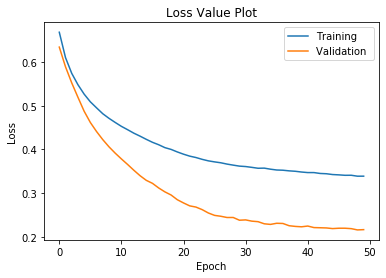

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Value Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation '], loc='upper right')
plt.savefig("Classifier 2 - Loss Plot.png")
plt.show()


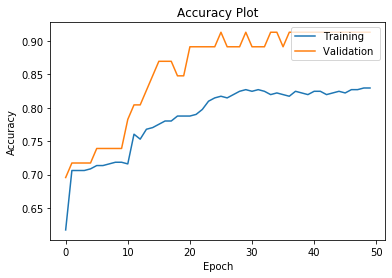

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation '], loc='upper right')
plt.savefig("Classifier 2 - Accuracy Plot.png")
plt.show()
